In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ab = pd.read_csv('data/ab_data.csv')
ab.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [4]:
ab['timestamp'] = pd.to_datetime(ab['timestamp'], format='%Y-%m-%d')

In [5]:
daily_data = ab.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [6]:
daily_data['conversion'] = round(daily_data['converted']/daily_data['users_count']*100, 2)

In [7]:
daily_data.head(10)

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.52
1,2017-01-02,B,2848,339,11.90
2,2017-01-03,A,6584,749,11.38
3,2017-01-03,B,6620,754,11.39
4,2017-01-04,A,6573,797,12.13
5,2017-01-04,B,6538,763,11.67
6,2017-01-05,A,6419,791,12.32
7,2017-01-05,B,6509,743,11.41
8,2017-01-06,A,6604,762,11.54
9,2017-01-06,B,6735,834,12.38


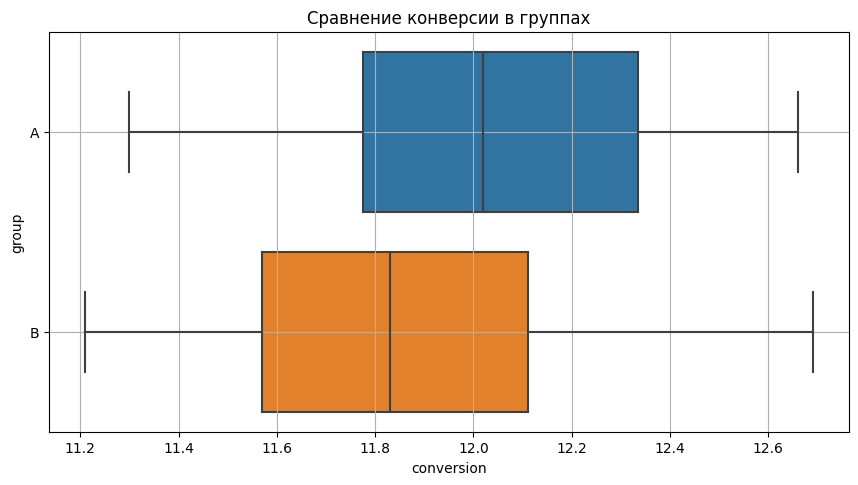

In [8]:
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid();

In [9]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)
display(conversion_piv)

,mean,median
group,,
A,12.033478,12.02
B,11.872174,11.83


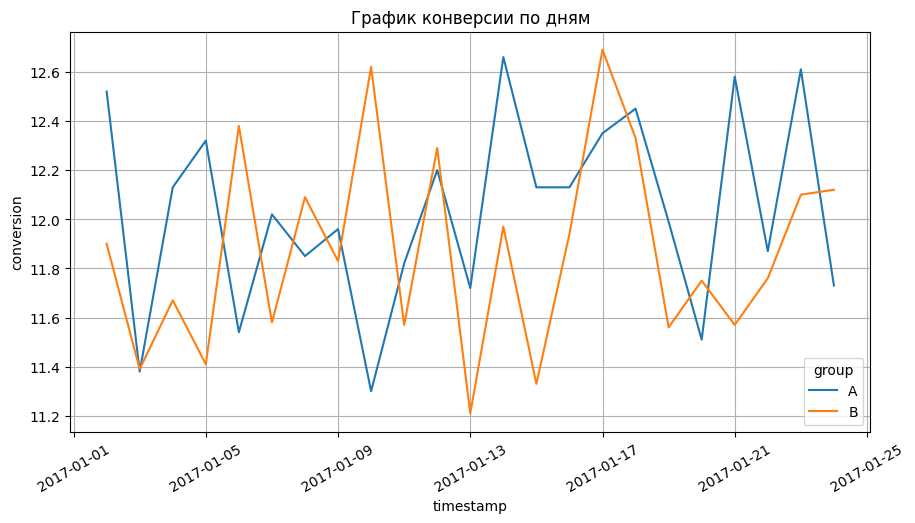

In [10]:
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=30)
# задаём отображение сетки
ax.grid();

In [11]:
# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a['cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a.head())

C:\Users\Michael Brown\AppData\Local\Temp\ipykernel_13628\3017515438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_a['cum_users_count'] = daily_data_a['users_count'].cumsum()


,timestamp,group,users_count,converted,conversion,cum_users_count
0,2017-01-02,A,2851,357,12.52,2851
2,2017-01-03,A,6584,749,11.38,9435
4,2017-01-04,A,6573,797,12.13,16008
6,2017-01-05,A,6419,791,12.32,22427
8,2017-01-06,A,6604,762,11.54,29031


In [12]:
# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.52,2851,357,12.521922
1,2017-01-02,B,2848,339,11.90,2848,339,11.903090
2,2017-01-03,A,6584,749,11.38,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.39,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.13,16008,1903,11.887806


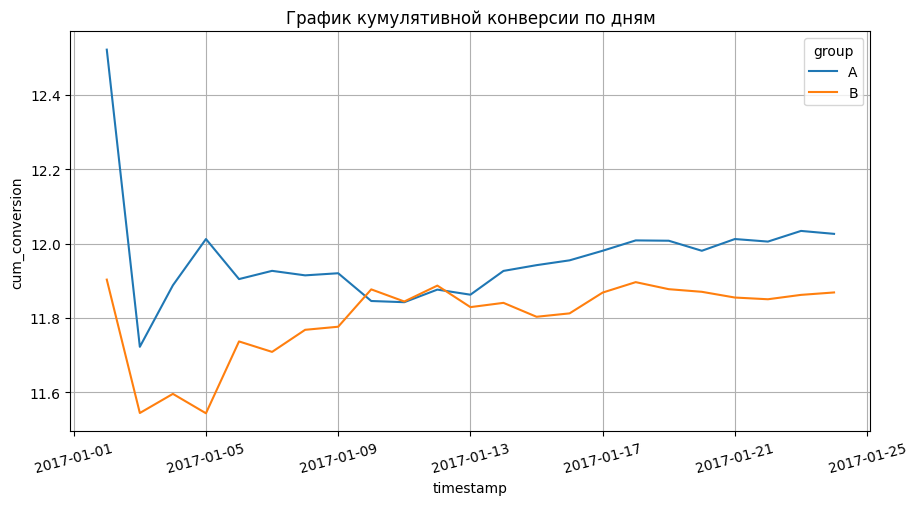

In [13]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 15)
# задаём отображение сетки
ax.grid(True)

In [14]:
aba = pd.read_csv('data/sample_a.csv')
abb = pd.read_csv('data/sample_b.csv')

In [15]:
aba.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A


In [16]:
abb.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.000135e+09,0,0,B
1,2020-11-06,1.001648e+09,0,0,B
2,2020-11-06,1.003214e+08,0,0,B
3,2020-11-06,1.003652e+09,0,0,B
4,2020-11-06,1.003833e+09,0,0,B


In [17]:
aba['date'] = pd.to_datetime(aba['date'], format='%Y-%m-%d')
ddata_a = aba.groupby(['date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue': 'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
ddata_a.head(5)

,date,users_count,transactions,revenue
0,2020-11-06,2576,16,1577279
1,2020-11-07,2704,23,1721886
2,2020-11-08,3354,25,846051
3,2020-11-09,3234,18,708830
4,2020-11-10,3022,29,826984


In [18]:
abb['date'] = pd.to_datetime(abb['date'], format='%Y-%m-%d')
ddata_b = abb.groupby(['date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue': 'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
ddata_b.head(5)

,date,users_count,transactions,revenue
0,2020-11-06,2499,19,996645
1,2020-11-07,2804,19,555499
2,2020-11-08,3291,24,3044842
3,2020-11-09,3062,25,1285836
4,2020-11-10,3072,30,2414726


In [19]:
ddata_a['cum_users_count'] = ddata_a['users_count'].cumsum()
ddata_a['cum_transactions'] = ddata_a['transactions'].cumsum()
ddata_a['cum_revenue'] = ddata_a['revenue'].cumsum()
ddata_a['cum_conversion'] = ddata_a['cum_transactions']/ddata_a['cum_users_count']*100
ddata_a['av_bill'] = round(ddata_a['cum_revenue']/ddata_a['cum_transactions'], 2)
ddata_a

,date,users_count,transactions,revenue,cum_users_count,cum_transactions,cum_revenue,cum_conversion,av_bill
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,98579.94
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,84593.97
2,2020-11-08,3354,25,846051,8634,64,4145216,0.741256,64769.00
3,2020-11-09,3234,18,708830,11868,82,4854046,0.690934,59195.68
4,2020-11-10,3022,29,826984,14890,111,5681030,0.745467,51180.45
5,2020-11-11,3218,19,1209656,18108,130,6890686,0.717915,53005.28
6,2020-11-12,3467,19,607839,21575,149,7498525,0.690614,50325.67
7,2020-11-13,3676,36,1338816,25251,185,8837341,0.732644,47769.41
8,2020-11-14,3372,30,2659277,28623,215,11496618,0.751144,53472.64
9,2020-11-15,3881,27,1189970,32504,242,12686588,0.744524,52423.92


In [20]:
ddata_b['cum_users_count'] = ddata_b['users_count'].cumsum()
ddata_b['cum_transactions'] = ddata_b['transactions'].cumsum()
ddata_b['cum_revenue'] = ddata_b['revenue'].cumsum()
ddata_b['cum_conversion'] = ddata_b['cum_transactions']/ddata_b['cum_users_count']*100
ddata_b['av_bill'] = round(ddata_b['cum_revenue']/ddata_b['cum_transactions'], 2)
ddata_b

,date,users_count,transactions,revenue,cum_users_count,cum_transactions,cum_revenue,cum_conversion,av_bill
0,2020-11-06,2499,19,996645,2499,19,996645,0.760304,52455.00
1,2020-11-07,2804,19,555499,5303,38,1552144,0.716576,40845.89
2,2020-11-08,3291,24,3044842,8594,62,4596986,0.721434,74144.94
3,2020-11-09,3062,25,1285836,11656,87,5882822,0.746397,67618.64
4,2020-11-10,3072,30,2414726,14728,117,8297548,0.794405,70919.21
5,2020-11-11,3208,22,3555727,17936,139,11853275,0.774978,85275.36
6,2020-11-12,3494,25,915653,21430,164,12768928,0.765282,77859.32
7,2020-11-13,3606,37,1703475,25036,201,14472403,0.802844,72002.00
8,2020-11-14,3276,34,2369998,28312,235,16842401,0.830037,71669.79
9,2020-11-15,3919,27,1147144,32231,262,17989545,0.812882,68662.39


C:\Users\Michael Brown\AppData\Local\Temp\ipykernel_13628\3550378151.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date', y='cum_conversion', data=ddata_a, ax=ax, palette="red")
C:\Users\Michael Brown\AppData\Local\Temp\ipykernel_13628\3550378151.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date', y='cum_conversion', data=ddata_b, ax=ax, palette="blue")


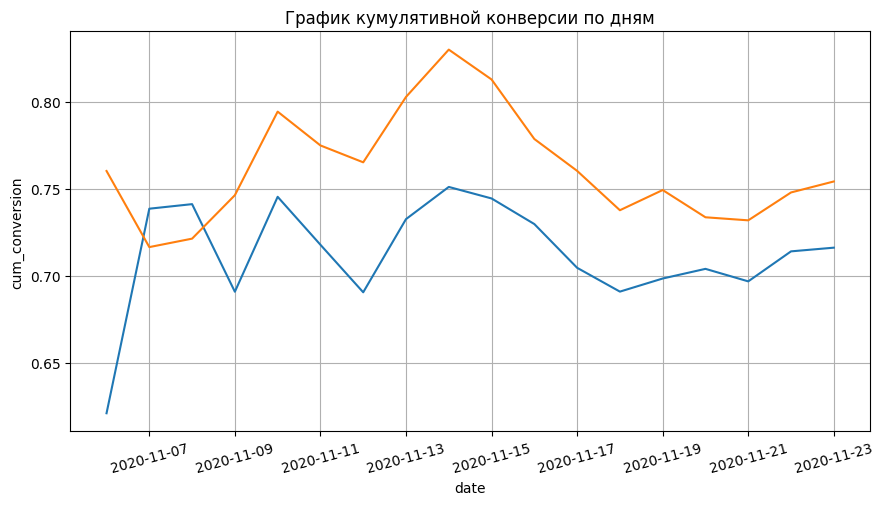

In [21]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([1, 1, 1, 1])
sns.lineplot(x='date', y='cum_conversion', data=ddata_a, ax=ax, palette="red")
sns.lineplot(x='date', y='cum_conversion', data=ddata_b, ax=ax, palette="blue")
ax.set_title('График кумулятивной конверсии по дням')
ax.xaxis.set_tick_params(rotation = 15)
ax.grid(True)

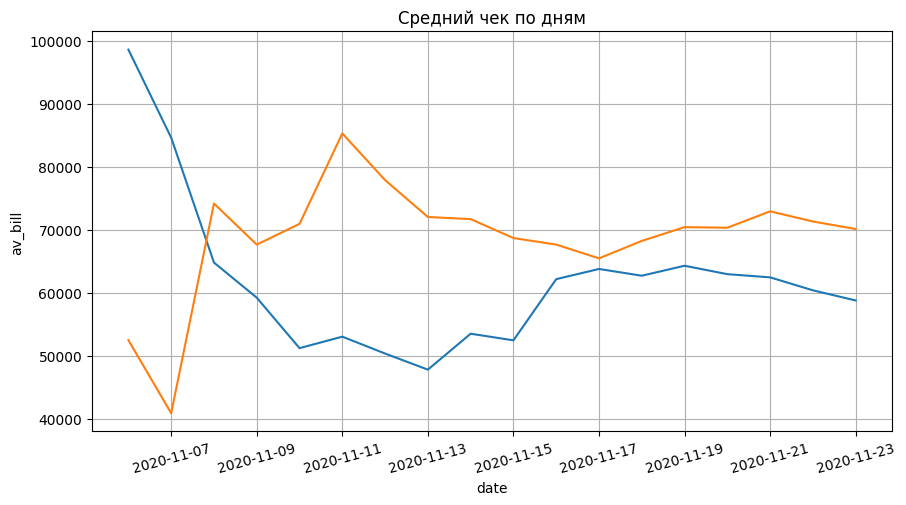

In [22]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([1, 1, 1, 1])
sns.lineplot(x='date', y='av_bill', data=ddata_a, ax=axes)
sns.lineplot(x='date', y='av_bill', data=ddata_b, ax=axes)
axes.set_title('Средний чек по дням')
axes.xaxis.set_tick_params(rotation = 15)
axes.grid(True)

In [23]:
from statsmodels.stats.proportion import proportions_ztest

In [24]:
converted_piv= ab.groupby('group')['converted'].agg(
    ['sum', 'count']
)
display(converted_piv)

,sum,count
group,,
A,17467,145241
B,17238,145241


In [25]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе B'
alpha = 0.1 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число "успехов"
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу: {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value:  0.1
# Принимаем нулевую гипотезу. Конверсии в группах А и B равны

p-value:  0.1
Отвергаем нулевую гипотезу: Конверсии в группах А и B равны
Альтернативная гипотеза. H1: Конверсия в группе А выше, чем конверсия в группе B


In [26]:
time_data = pd.read_excel('data/time_data.xlsx')
display(time_data.head())

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


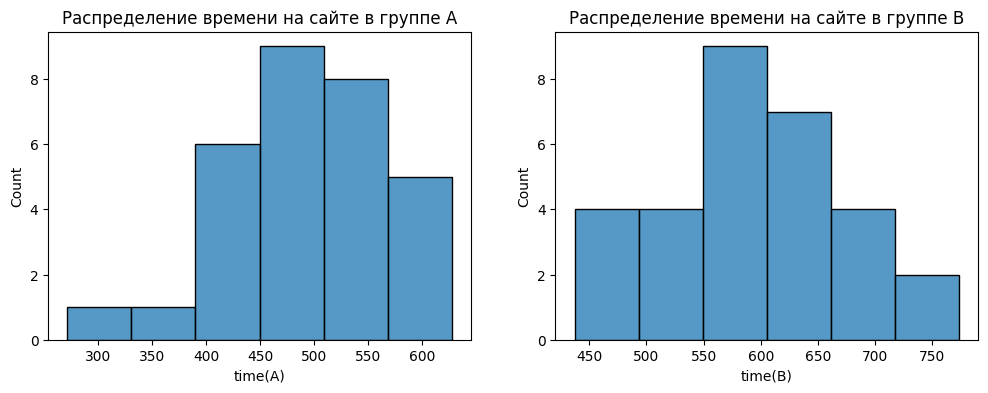

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='time(A)', data=time_data, ax=axes[0])
sns.histplot(x='time(B)', data=time_data, ax=axes[1])
#задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');

In [28]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(time_data['time(A)'])
shapiro_result_b = shapiro(time_data['time(B)'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value группы А 0.43
# p-value группы B 0.12
# Принимаем нулевую гипотезу. Распределения в обеих группах нормальные

p-value группы А 0.43
p-value группы B 0.12
Принимаем нулевую гипотезу. Распределения в обеих группах нормальные


In [29]:
from scipy.stats import ttest_ind
# нулевая и альтернативная гипотезы
H0 = 'Среднее время в группах одинаково'
H1 = 'Среднее время в группе А меньше, чем в группе B'
alpha = 0.05 #уровень значимости
#вычисляем результат T-теста для выборок
results = ttest_ind(
    a=time_data['time(A)'],
    b=time_data['time(B)'], 
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value: 0.0
# Отвергаем нулевую гипотезу. Среднее время в группах одинаково
# Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B

p-value: 0.0
Отвергаем нулевую гипотезу. Среднее время в группах одинаково
Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B


In [30]:
converted_piv['count'] = aba['transactions'].sum() + abb['transactions'].sum()
converted_piv['nobs'] = aba['cid'].count() + abb['cid'].count()
display(converted_piv)

,sum,count,nobs
group,,,
A,17467,904,122954
B,17238,904,122954


In [31]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе B'
alpha = 0.1 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['count'],
    nobs=converted_piv['nobs'], 
    alternative='smaller',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу: {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value:  0.1
# Принимаем нулевую гипотезу. Конверсии в группах А и B равны

p-value:  0.5
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


In [32]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.1 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(ddata_a['av_bill'])
shapiro_result_b = shapiro(ddata_b['av_bill'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value группы А 0.43
# p-value группы B 0.12
# Принимаем нулевую гипотезу. Распределения в обеих группах нормальные

p-value группы А 0.0
p-value группы B 0.0
Отвергаем нулевую гипотезу. Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


In [33]:
n = 36 # размер выборки
x_mean = 16100 # выборочное среднее
sigma = 12000 # истинное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [34]:
from scipy.stats import norm
z_crit = -norm.ppf(alpha/2)
z_crit

1.959963984540054

In [35]:
eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат
 
 
 
# Доверительный интервал: (12180, 20020)

Доверительный интервал: (12180, 20020)


In [36]:
def conf_int(n, x, sigma, gamma=0.95):
    alpha = 1 - gamma
    from scipy.stats import norm
    z_crit = -norm.ppf(alpha/2)
    eps = z_crit * sigma/(n ** 0.5)
    lower_bound = x - eps
    upper_bound = x + eps
    confidence_interval = (round(lower_bound, 2), round(upper_bound, 2))
    return (z_crit, confidence_interval)

In [37]:
display(conf_int(64, 12.35, 2.4, 0.9))

(1.6448536269514729, (11.86, 12.84))

In [38]:
display(conf_int(15, 2000, 400, 0.95))

(1.959963984540054, (1797.58, 2202.42))

In [39]:
n = 15 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 2000 # выборочное среднее
x_std = 400 # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [40]:
from scipy.stats import t
t_crit = -t.ppf(alpha/2, k) # t-критическое

In [41]:
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (1778, 2222)


In [42]:
def conf_int2(n, x_mean, x_std, gamma=0.95):
    k = n - 1
    alpha = 1 - gamma
    from scipy.stats import t
    t_crit = -t.ppf(alpha/2, k)
    eps = t_crit * x_std/(n ** 0.5)
    lower_bound = x_mean - eps
    upper_bound = x_mean + eps
    confidence_interval = (round(lower_bound, 2), round(upper_bound, 2))
    return (t_crit, confidence_interval)

In [43]:
display(conf_int2(15, 2000, 400, 0.95))

(2.1447866879169273, (1778.49, 2221.51))

In [44]:
display(conf_int2(25, 3540, 1150, 0.9))

(1.7108820799094284, (3146.5, 3933.5))

In [45]:
ab_data = pd.read_csv('data/ab_data.csv')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [46]:
#фильтруем данные группы А
a_data = ab_data[ab_data['group'] == 'A']
#фильтруем данные группы B
b_data = ab_data[ab_data['group'] == 'B']

In [47]:
def proportions_conf_interval(n, x_p, gamma=0.95):   
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

In [48]:
conf_interval_a = proportions_conf_interval(
n=a_data['user_id'].count(), # размер выборки
x_p=a_data['converted'].mean() # выборочная пропорция
)
conf_interval_b = proportions_conf_interval(
n=b_data['user_id'].count(), # размер выборки
x_p=b_data['converted'].mean() # выборочная пропорция
)
print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))
print('Доверительный интервал для конверсии группы B: {}'.format(conf_interval_b))

Доверительный интервал для конверсии группы А: (11.86, 12.19)
Доверительный интервал для конверсии группы B: (11.7, 12.03)


In [49]:
def diff_proportions_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

In [50]:
# размеры выборок групп А и B
n = [a_data['user_id'].count(), b_data['user_id'].count()]
# выборочная пропорция групп A и B
xp = [a_data['converted'].mean(), b_data['converted'].mean()]
# строим доверительный интервал для разности конверсий
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))

Доверительный интервал для разности конверсий: (-0.39, 0.08)


In [51]:
display(proportions_conf_interval(189, 132/189, 0.9))

(64.35, 75.33)

In [52]:
display(diff_proportions_conf_interval([1000, 1000], [45/1000, 50/1000]))

(-1.36, 2.36)

In [53]:
abtour = pd.read_csv('data/ab_data_tourist.csv')
abtour.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000
